In [41]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
from scipy.stats import zscore

BENIN DATA ANALYSIS

In [24]:
benin_data = pd.read_csv('../data/benin-malanville.csv')
benin_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [4]:
benin_data.shape

(525600, 19)

In [6]:
data_types = benin_data.dtypes
data_types

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [7]:
missing_values = benin_data.isnull().sum()
missing_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [8]:
benin_data.duplicated().sum()

np.int64(0)

In [25]:
benin_data.drop('Comments', axis=1)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9


In [26]:
summary_stats = benin_data.describe()
print("Summary Statistics: \n", summary_stats)

Summary Statistics: 
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%        

In [27]:

# Check for outliers (e.g., in GHI, DNI, DHI)
outliers = benin_data[(benin_data['GHI'] < 0) | (benin_data['DNI'] < 0) | (benin_data['DHI'] < 0)]
print("Outliers:\n", outliers)

Outliers:
                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDst

In [28]:
# Convert Timestamp to datetime
benin_data['Timestamp'] = pd.to_datetime(benin_data['Timestamp'])

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


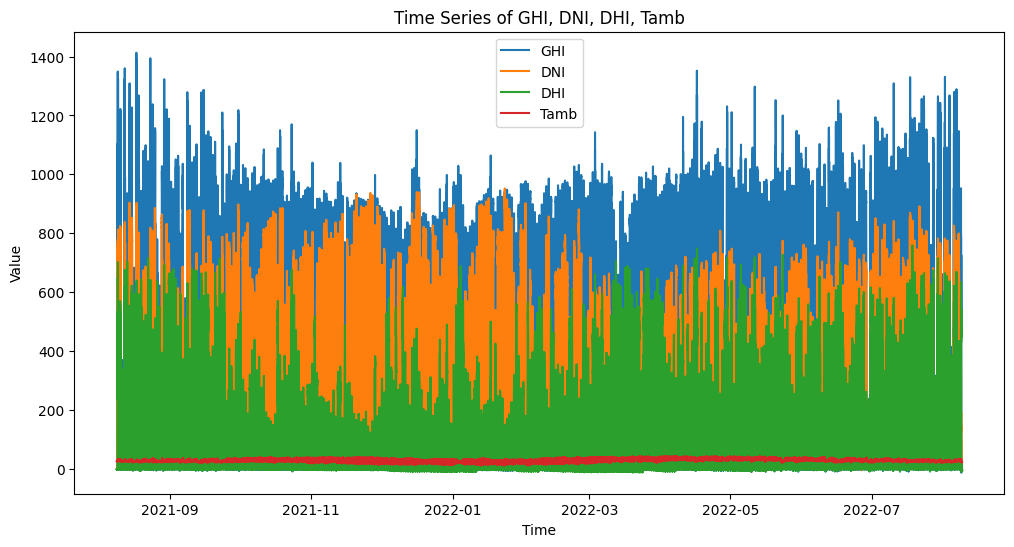

In [29]:
# Plot time series for GHI, DNI, DHI, Tamb
mp.pyplot.figure(figsize=(12, 6))
mp.pyplot.plot(benin_data['Timestamp'], benin_data['GHI'], label='GHI')
mp.pyplot.plot(benin_data['Timestamp'], benin_data['DNI'], label='DNI')
mp.pyplot.plot(benin_data['Timestamp'], benin_data['DHI'], label='DHI')
mp.pyplot.plot(benin_data['Timestamp'], benin_data['Tamb'], label='Tamb')
mp.pyplot.xlabel('Time')
mp.pyplot.ylabel('Value')
mp.pyplot.title('Time Series of GHI, DNI, DHI, Tamb')
mp.pyplot.legend()
mp.pyplot.show()

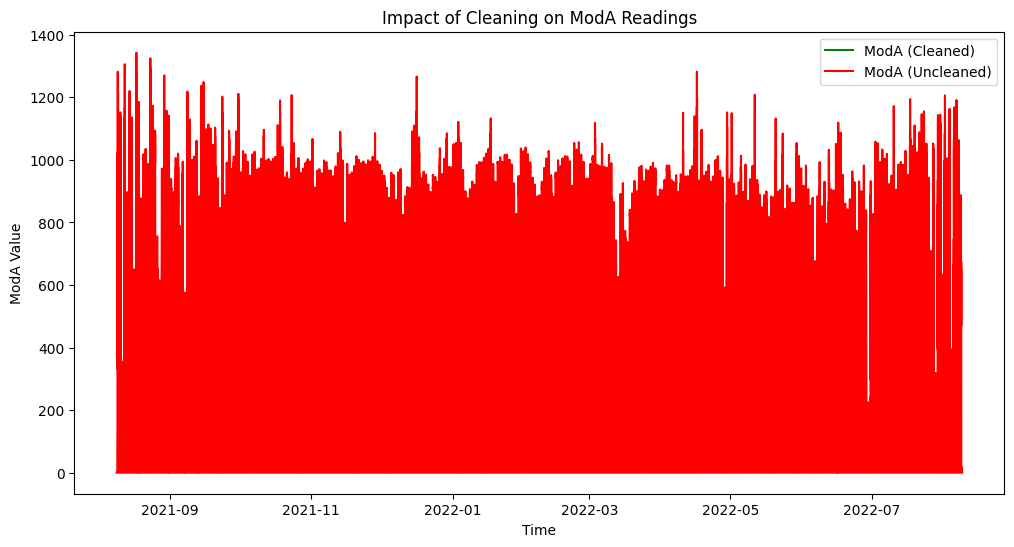

In [30]:
# Compare ModA and ModB readings before and after cleaning
cleaned_data = benin_data[benin_data['Cleaning'] == 1]
uncleaned_data = benin_data[benin_data['Cleaning'] == 0]

mp.pyplot.figure(figsize=(12, 6))
mp.pyplot.plot(cleaned_data['Timestamp'], cleaned_data['ModA'], label='ModA (Cleaned)', color='green')
mp.pyplot.plot(uncleaned_data['Timestamp'], uncleaned_data['ModA'], label='ModA (Uncleaned)', color='red')
mp.pyplot.xlabel('Time')
mp.pyplot.ylabel('ModA Value')
mp.pyplot.title('Impact of Cleaning on ModA Readings')
mp.pyplot.legend()
mp.pyplot.show()

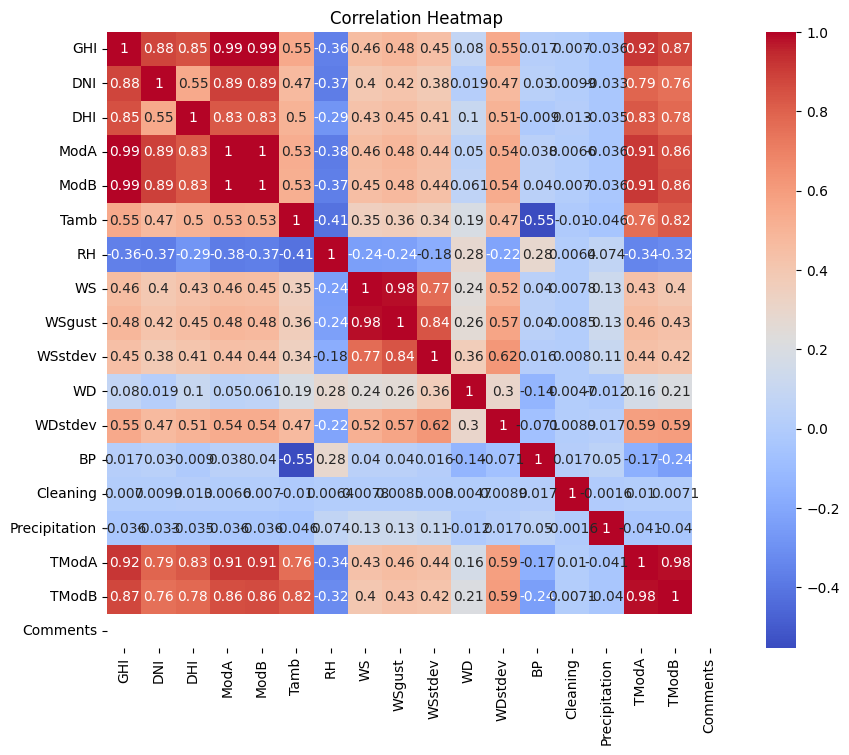

In [31]:
# Correlation heatmap
mp.pyplot.figure(figsize=(10, 8))
corr = benin_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
mp.pyplot.title('Correlation Heatmap')
mp.pyplot.show()

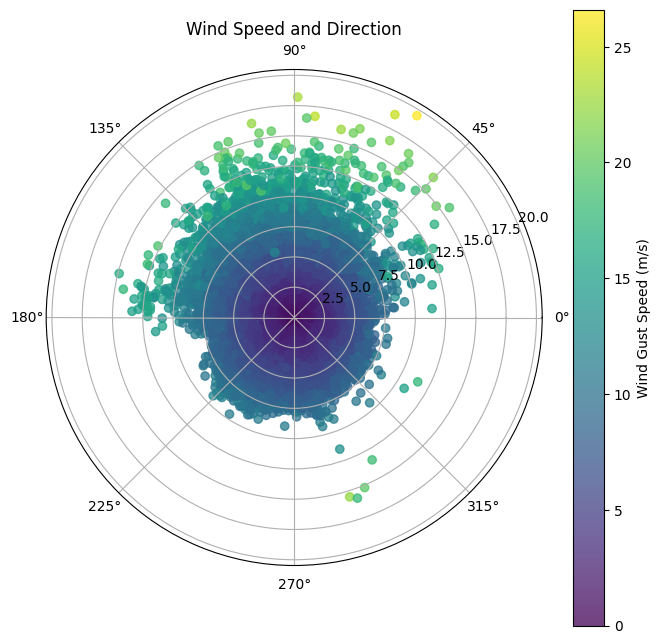

In [36]:
# Polar plot for wind speed and direction

mp.pyplot.figure(figsize=(8, 8))
mp.pyplot.subplot(projection='polar')
# mp.pyplot.scatter(benin_data['WD'] * np.pi / 180, benin_data['WS'], c=benin_data['WSgust'], cmap=mp.viridis, alpha=0.75)
mp.pyplot.scatter(benin_data['WD'] * np.pi / 180, benin_data['WS'], c=benin_data['WSgust'], alpha=0.75)
mp.pyplot.colorbar(label='Wind Gust Speed (m/s)')
mp.pyplot.title('Wind Speed and Direction')
mp.pyplot.show()

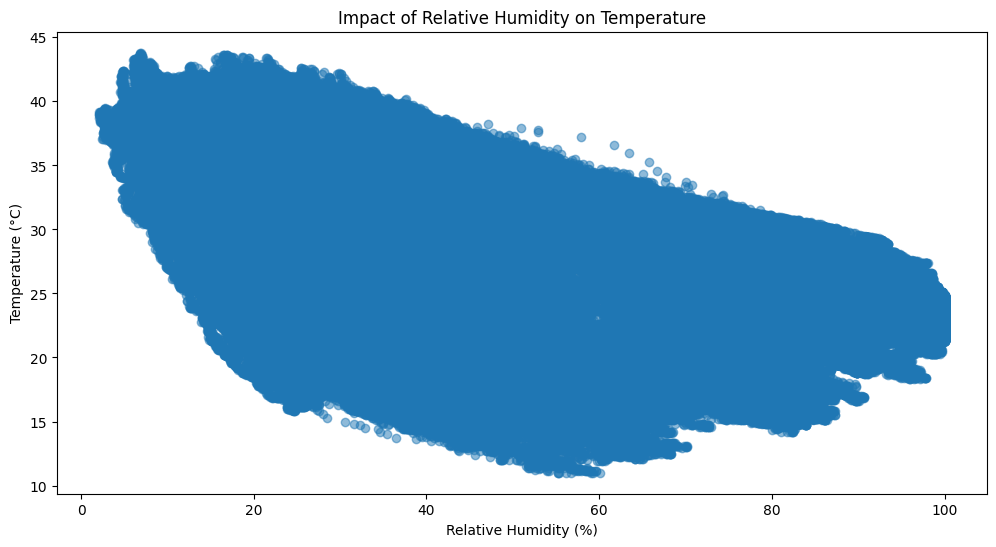

In [37]:

# Scatter plot to explore the influence of RH on temperature
mp.pyplot.figure(figsize=(12, 6))
mp.pyplot.scatter(benin_data['RH'], benin_data['Tamb'], alpha=0.5)
mp.pyplot.xlabel('Relative Humidity (%)')
mp.pyplot.ylabel('Temperature (°C)')
mp.pyplot.title('Impact of Relative Humidity on Temperature')
mp.pyplot.show()

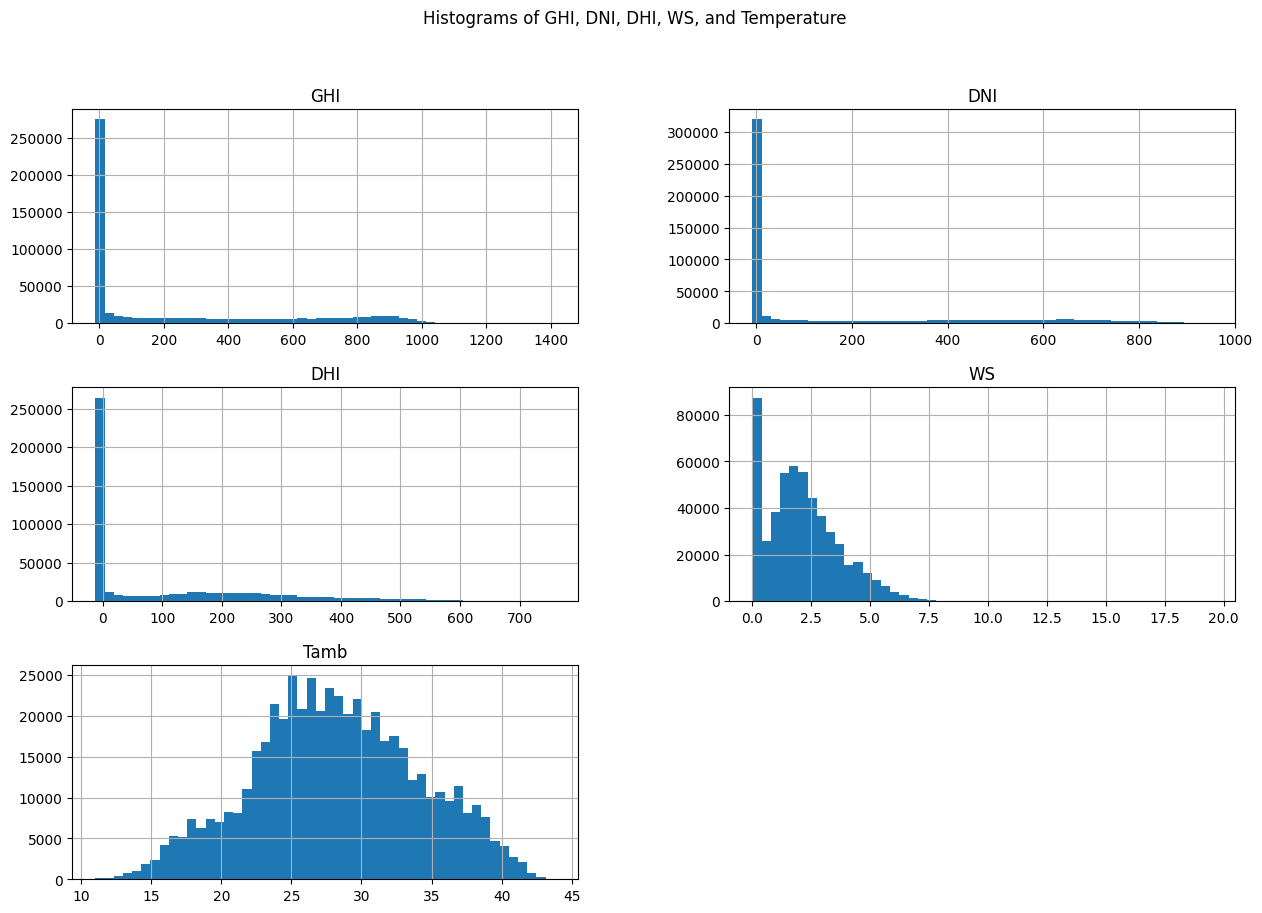

In [38]:

# Create histograms for GHI, DNI, DHI, WS, and temperatures
benin_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(figsize=(15, 10), bins=50)
mp.pyplot.suptitle('Histograms of GHI, DNI, DHI, WS, and Temperature')
mp.pyplot.show()

In [42]:
# Z-Score Analysis

benin_data['GHI_zscore'] = zscore(benin_data['GHI'])
zscore_outliers = benin_data[benin_data['GHI_zscore'].abs() > 3]
print("Z-Score Outliers:\n", zscore_outliers)

Z-Score Outliers:
                  Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
671    2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
674    2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
676    2021-08-09 11:17:00  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0   
849    2021-08-09 14:10:00  1253.0  714.8  552.5  1156.0  1155.0  31.0  64.2   
850    2021-08-09 14:11:00  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
517777 2022-08-03 13:38:00  1268.0  652.5  612.1  1163.0  1150.0  30.1  70.7   
520659 2022-08-05 13:40:00  1280.0  778.5  497.2  1168.0  1161.0  29.0  70.3   
520696 2022-08-05 14:17:00  1244.0  745.2  530.4  1126.0  1118.0  30.8  64.3   
522074 2022-08-06 13:15:00  1262.0  772.4  475.8  1166.0  1153.0  31.1  66.0   
522075 2022-08-06 13:16:00  1289.0  758.1  519.2  1191.0  1179.0  31.4  65.9   

         WS  WSgust 

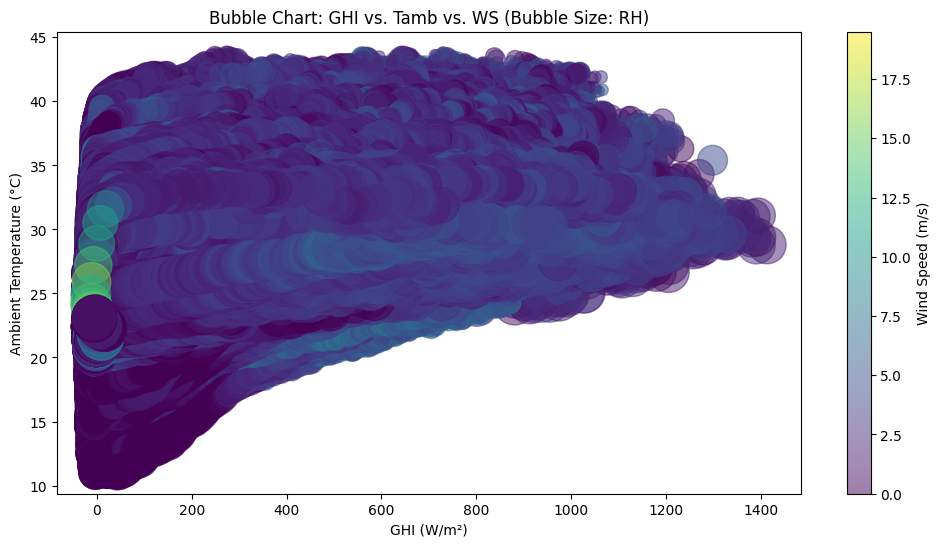

In [43]:
# Bubble chart for GHI vs. Tamb vs. WS, with RH as bubble size
mp.pyplot.figure(figsize=(12, 6))
mp.pyplot.scatter(benin_data['GHI'], benin_data['Tamb'], s=benin_data['RH']*10, alpha=0.5, c=benin_data['WS'], cmap='viridis')
mp.pyplot.colorbar(label='Wind Speed (m/s)')
mp.pyplot.xlabel('GHI (W/m²)')
mp.pyplot.ylabel('Ambient Temperature (°C)')
mp.pyplot.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size: RH)')
mp.pyplot.show()

In [44]:
# 1) Drop rows with missing data
benin_data_cleaned = benin_data.dropna(axis=1, how='all')  
# print("Cleaned Data:\n", benin_data_cleaned.head())

In [47]:
# Drop columns with all missing values
benin_data_cleaned = benin_data.dropna(axis=1, how='all')
print("Cleaned Data (Columns):\n", benin_data_cleaned.head())


Cleaned Data (Columns):
             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1 2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2 2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3 2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4 2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   GHI_zscore  
0   -0.730102  
1   -0.729800  
2   -0.729800  
3  